# Beginner's EDA project
## Overview

Let's say that we are planning to go out to see a movie, how well can we trust online reviews and ratings? *Especially* if the same company showing the rating *also* makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?

### Main goal

** Our goal is to do a thorough EDA(Exploratory Data Analysis) to see if the movie ratings from the site "Fandango" are biased,towards the movies that they seel their tickets on the site,and from the movies from other sites,not making a profit from ticket selling like (RottenTomatoes,IMDB etc..)

---
---

** Each task that we do will be written in bold and explained thoroughly before we see how to solve it.

---
----

## Understanding the Background and Data


**TASK: Read this article: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

----

After reading the article, read these two tables giving an overview of the two .csv files we will be working with:**

### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

----

First we are going to import all the Python libraries we will use throughout the project.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Now we are gonna explore the dataset and start to have a broader image of the data.

Let's first explore the Fandango ratings to see if our analysis agrees with the article's conclusion.

First we are going to read the first file('fandango_scrape.csv') from our pc.

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

Exploring  the DataFrame Properties and Head to see how our data looks like

In [3]:
fandango.head(5)

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


### After reading the data we can see that hopefully our dataframe is clean and does not have any null values that we need to address.

In [5]:
fandango.describe()

#From this dataframe we can see some key elements of the dataframe
#The minimum score for a movie is 1 star,same goes for ratings
#The maximum score for a movie is 5 stars,same goes for ratings

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


#### * Let's explore the relationship between popularity of a film and its rating.We are going to create a scatterplot showing the relationship between rating and votes. 

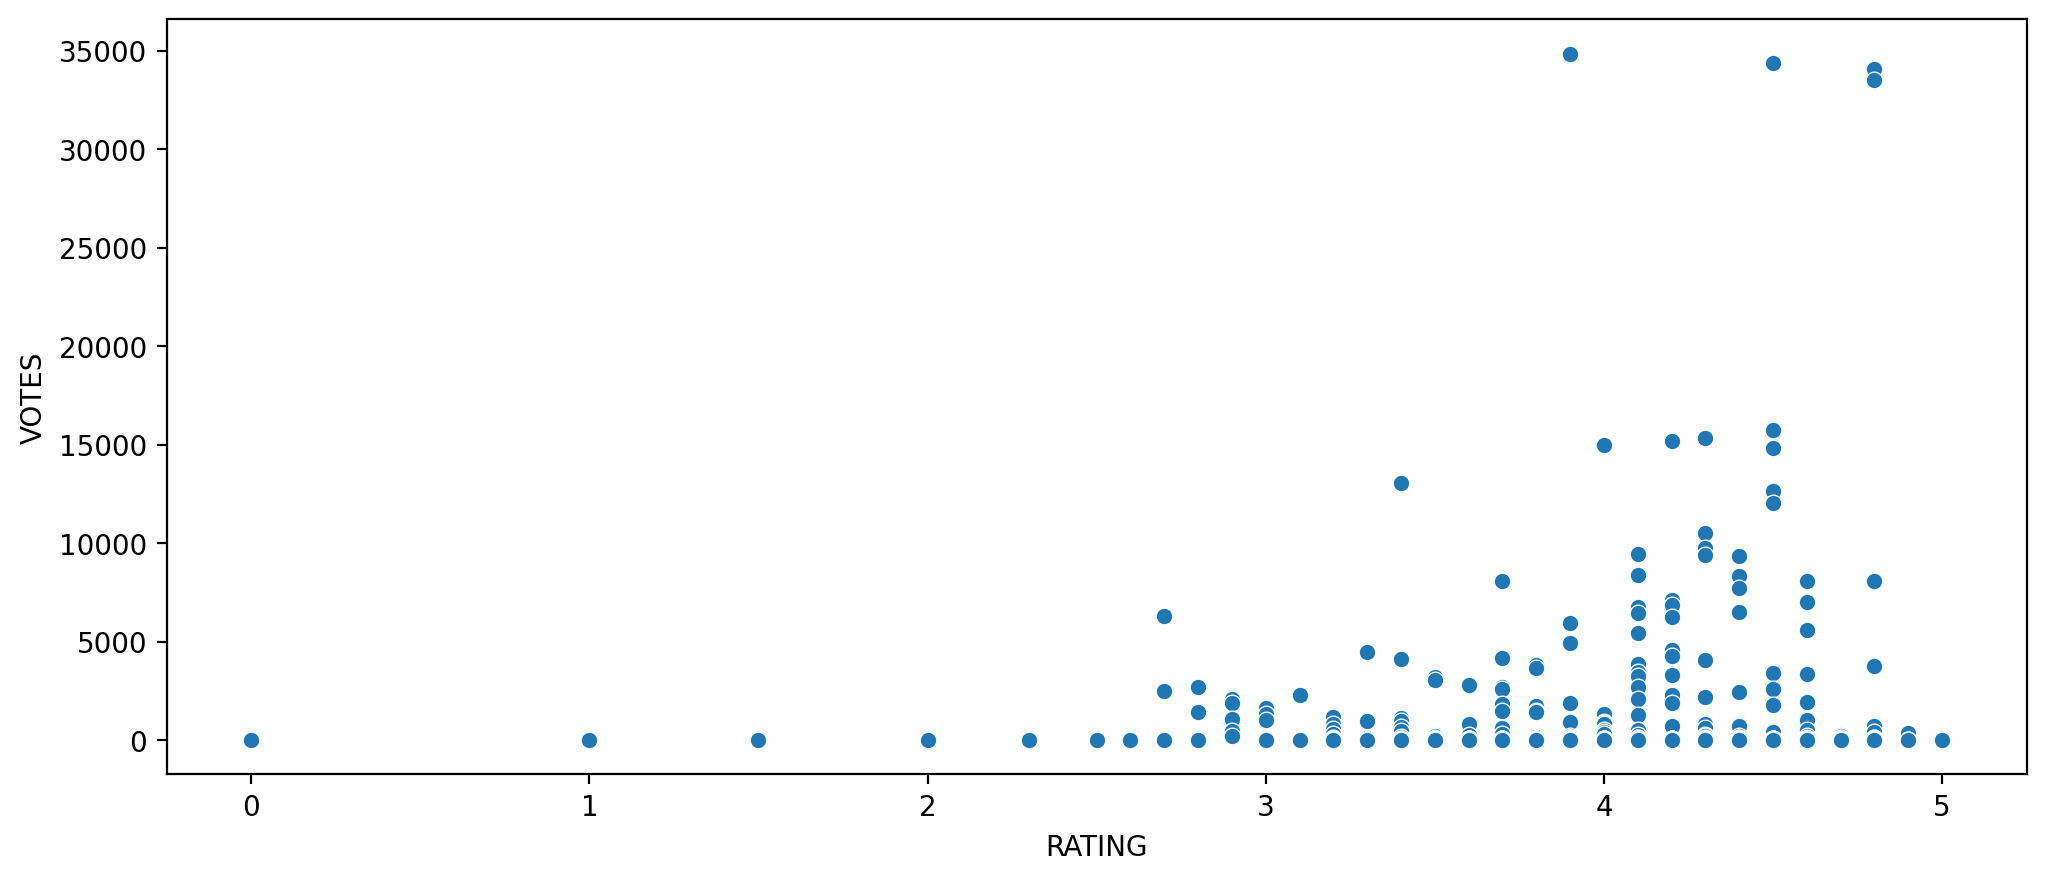

In [164]:
plt.figure(figsize=(12,5),dpi=200)
sns.scatterplot(data=fandango,x='RATING',y='VOTES')
plt.show()

** Then we are goinng to calculate the correlation between the columns:**

In [165]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


### From a quick look at the dataframe we can see that the film column of the data frame has the following format:

    Film Title Name (Year)
    
**We are going to create another column using the column 'FILM' to exract the year of release of all the movies and we are going to do it by applying a function to the existing column**

In [166]:
fandango['YEAR']=fandango['FILM'].apply(lambda film:film.split(' ')[-1])
fandango['YEAR']

0      (2015)
1      (2015)
2      (2015)
3      (2015)
4      (2015)
        ...  
499    (2015)
500    (2015)
501    (2015)
502    (1964)
503    (2012)
Name: YEAR, Length: 504, dtype: object

**Now we are going to see how many movies are released per year in our dataframe**

In [167]:
fandango['YEAR'].value_counts()

#We clearly see that most movies were released in 2015

(2015)    478
(2014)     23
(2016)      1
(1964)      1
(2012)      1
Name: YEAR, dtype: int64

**Now we are going to visualize the count of movies per year with a plot:**

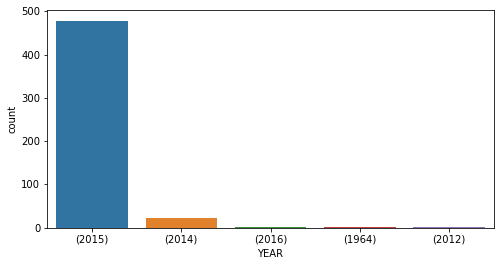

In [168]:
plt.figure(figsize=(8,4))
sns.countplot(data=fandango,x='YEAR')
plt.show()

**We see that in our countplot the year that dominated the number of movies that were released is 2015.**

**Now let's see which are the 10 movies with the highest number of votes?**

In [6]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337
6,Kingsman: The Secret Service (2015),4.5,4.2,15205
7,Minions (2015),4.0,4.0,14998
8,Avengers: Age of Ultron (2015),5.0,4.5,14846
9,Into the Woods (2014),3.5,3.4,13055


**Now let's see how many movies have zero votes

In [7]:
len(fandango[fandango['VOTES']==0].value_counts())

69

**Now we are going to create a new dataframe with movies that have 1 or more votes,meaning that we are going to exclude any films with zero votes from this new dataframe**

In [8]:
fan_reviewed=fandango[fandango['VOTES']>0]
fan_reviewed
        

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1
431,The Intern (2015),5.0,5.0,1
432,The Park Bench (2015),5.0,5.0,1
433,The Wanted 18 (2015),5.0,5.0,1


----

**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.**

**We are going to create a KDE plot (or multiple kdeplots) that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING).

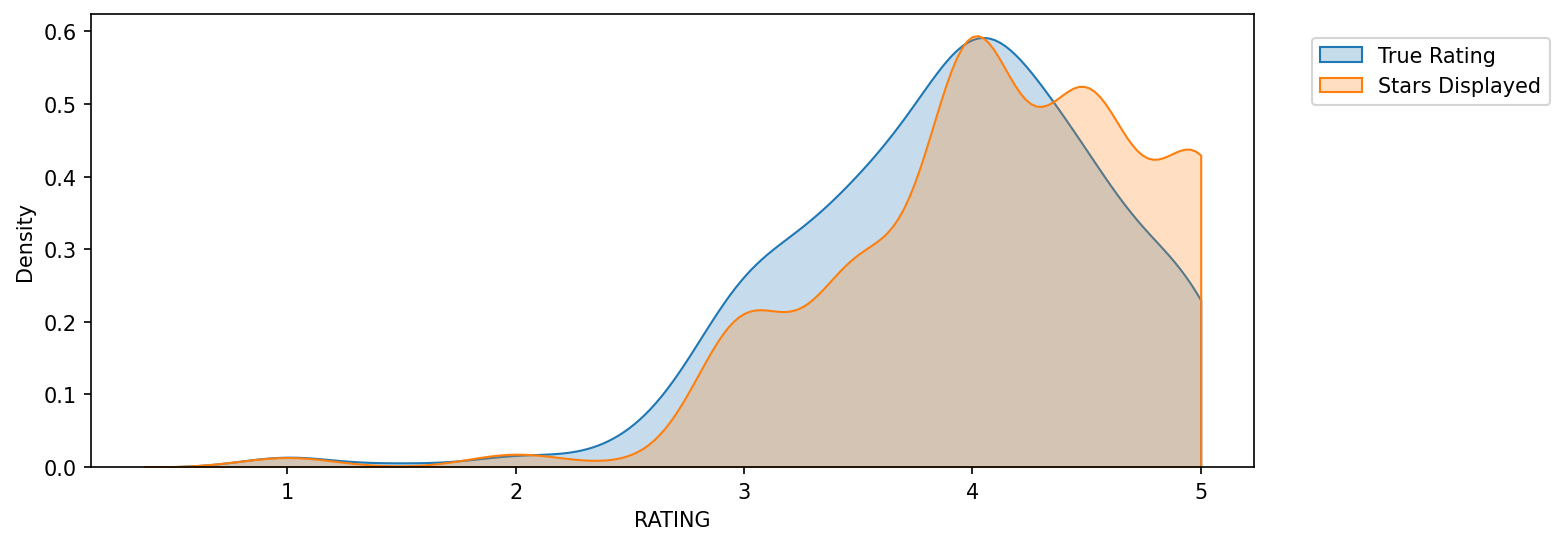

In [9]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=fan_reviewed,x='RATING',shade=True,clip=[0,5],label='True Rating')
sns.kdeplot(data=fan_reviewed,x='STARS',shade=True,clip=[0,5],label='Stars Displayed')
plt.legend(loc=(1.05,0.8))
plt.show()

#We clipped the KDE's from 0-5 cause the ratings and the stars only go from 0-5

**Let's now actually quantify this discrepancy. We will create a new column of the different between STARS displayed versus true RATING.**

In [25]:
fan_reviewed['STARS_DIFF']=fan_reviewed['STARS']-fan_reviewed['RATING']
fan_reviewed['STARS_DIFF'].round(1)
fan_reviewed

C:\Users\Kostas\AppData\Local\Temp/ipykernel_28020/1004367353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF']=fan_reviewed['STARS']-fan_reviewed['RATING']


,FILM,STARS,RATING,VOTES,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,0.1
1,Jurassic World (2015),4.5,4.5,34390,0.0
2,American Sniper (2015),5.0,4.8,34085,0.2
3,Furious 7 (2015),5.0,4.8,33538,0.2
4,Inside Out (2015),4.5,4.5,15749,0.0
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,0.0
431,The Intern (2015),5.0,5.0,1,0.0
432,The Park Bench (2015),5.0,5.0,1,0.0
433,The Wanted 18 (2015),5.0,5.0,1,0.0


**TASK: Create a count plot to display the number of times a certain difference occurs:**

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

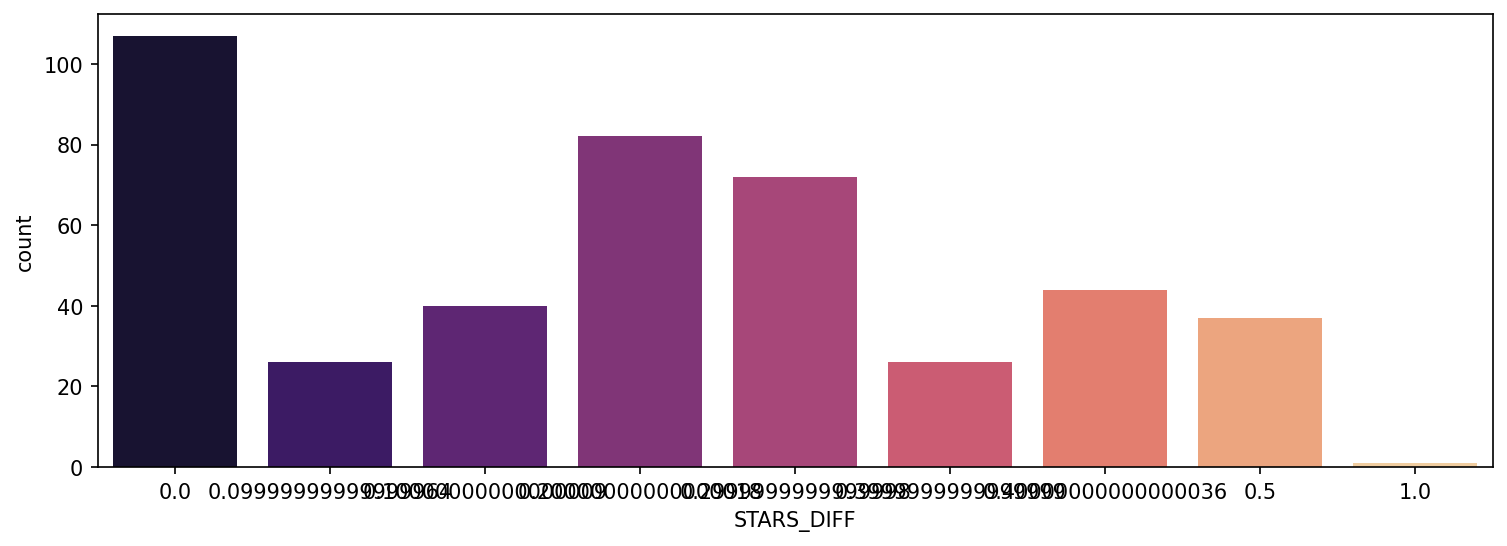

In [26]:
plt.figure(figsize=(12,4),dpi=150)
sns.countplot(data=fan_reviewed,x='STARS_DIFF',palette='magma')

**We can see from the plot that one movie was displaying over a 1 star difference than its true rating! What movie had this close to 1 star differential?**

In [28]:
fan_reviewed[fan_reviewed['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,1.0


**We see that only this above movie had this major difference between the rating and and the stars**

## Comparison of Fandango Ratings to Other Sites

Let's now compare the scores from Fandango to other movies sites and see how they compare.

**We are going to read in the "all_sites_scores.csv" file by running the cell below**

In [30]:
all_sites = pd.read_csv("all_sites_scores.csv")

**Now we are going to explore the DataFrame columns, info, description.**

In [31]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


**Let's now explore the columns of the new dataframe to get to know the data better**

In [34]:
all_sites.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count'],
      dtype='object')

In [35]:
all_sites.info()

#No null values present in the dataframe so we don't need to address null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [36]:
all_sites.describe()

#A description of our data.

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

**We are to create a scatterplot exploring the relationship between RT Critic reviews and RT User reviews.**

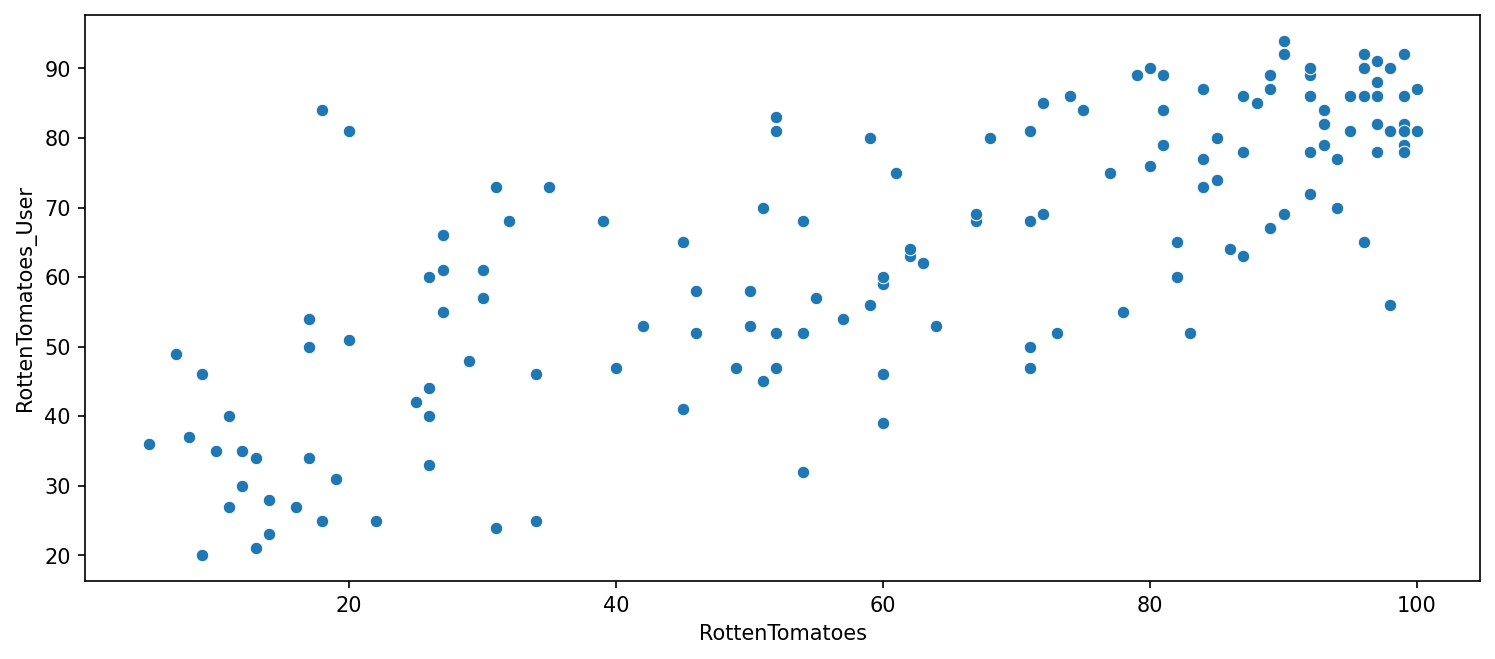

In [38]:
plt.figure(figsize=(12,5),dpi=150)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.show()

Let's quantify this difference by comparing the critics ratings and the RT User ratings. We will calculate this with RottenTomatoes-RottenTomatoes_User. Note: Rotten_Diff here is Critics - User Score. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.

**We will create a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes. Calculate this with RottenTomatoes-RottenTomatoes_User**

In [39]:
all_sites['USER_DIFF']=all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']
all_sites['USER_DIFF'].round(2)
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,USER_DIFF
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

**Now we are to calculate the Mean Absolute Difference between RT scores and RT User scores as described above.**

In [178]:
all_sites['USER_DIFF'].apply(abs).mean()

15.095890410958905

**Now we are going to plot the distribution of the differences between RT Critics Score and RT User Score. There should be negative values in this distribution plot. We are also going to use the KDE on this distplot to showcase the distribution of the difference**

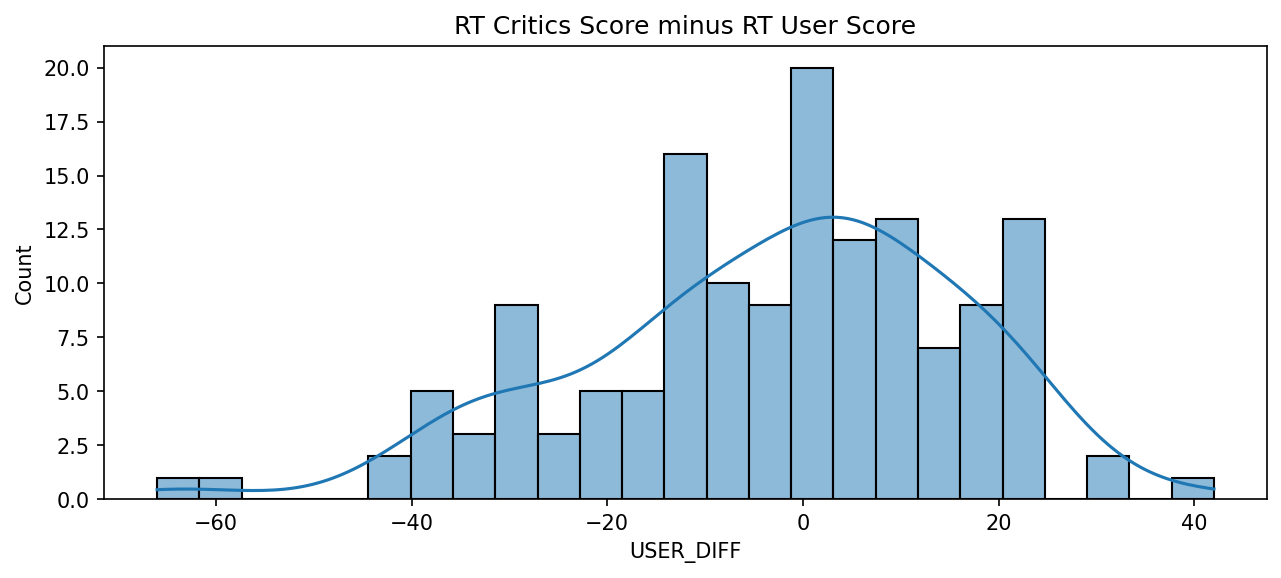

In [40]:
plt.figure(figsize=(10,4),dpi=150)
sns.histplot(data=all_sites,x='USER_DIFF',kde=True,bins=25)
plt.title('RT Critics Score minus RT User Score')
plt.show()

**TASK: Now create a distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes.**

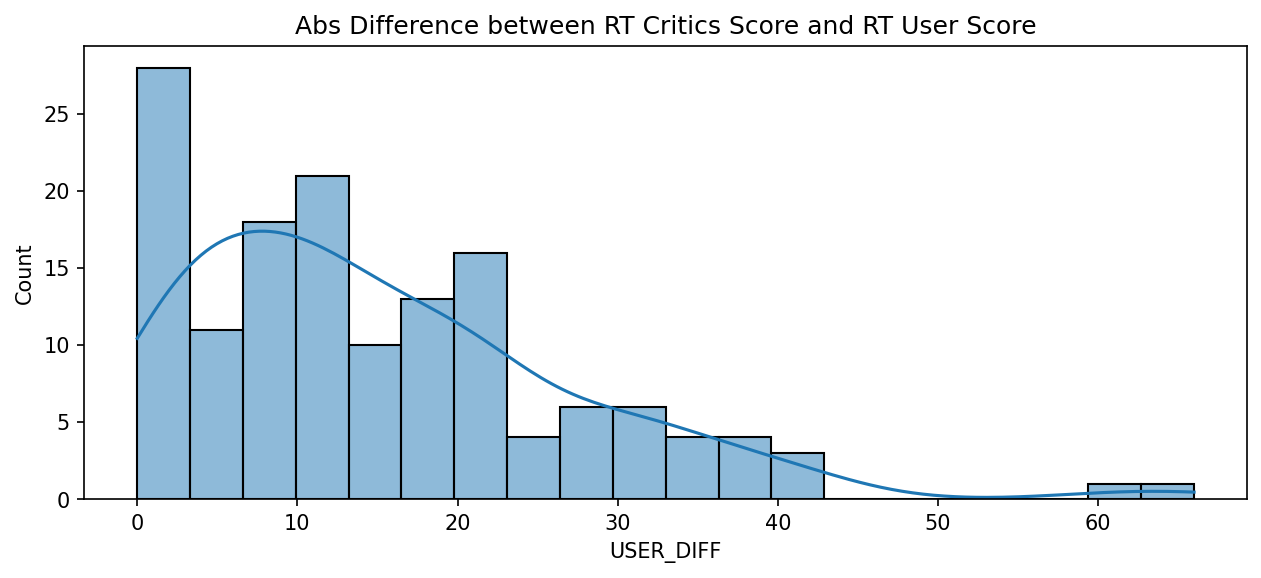

In [42]:
plt.figure(figsize=(10,4),dpi=150)
sns.histplot(data=all_sites['USER_DIFF'].apply(abs),bins=20,kde=True)
plt.title('Abs Difference between RT Critics Score and RT User Score')
plt.show()

**Let's find out which movies are causing the largest differences. First, show the top 5 movies with the largest *negative* difference between Users and RT critics. Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.**

**What are the top 5 movies users rated higher than critics on average:**

In [45]:
all_sites[['FILM','USER_DIFF']].sort_values('USER_DIFF')[:5]

#Users hate but critics love.

,FILM,USER_DIFF
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


**Now we are going to show the top 5 movies critics scores higher than users on average.**

In [46]:
all_sites[['FILM','USER_DIFF']].sort_values('USER_DIFF',ascending=False)[:5]

#Critics love but users hate

,FILM,USER_DIFF
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

**We are going to display a scatterplot of the Metacritic Rating versus the Metacritic User rating.**

In [47]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,USER_DIFF
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

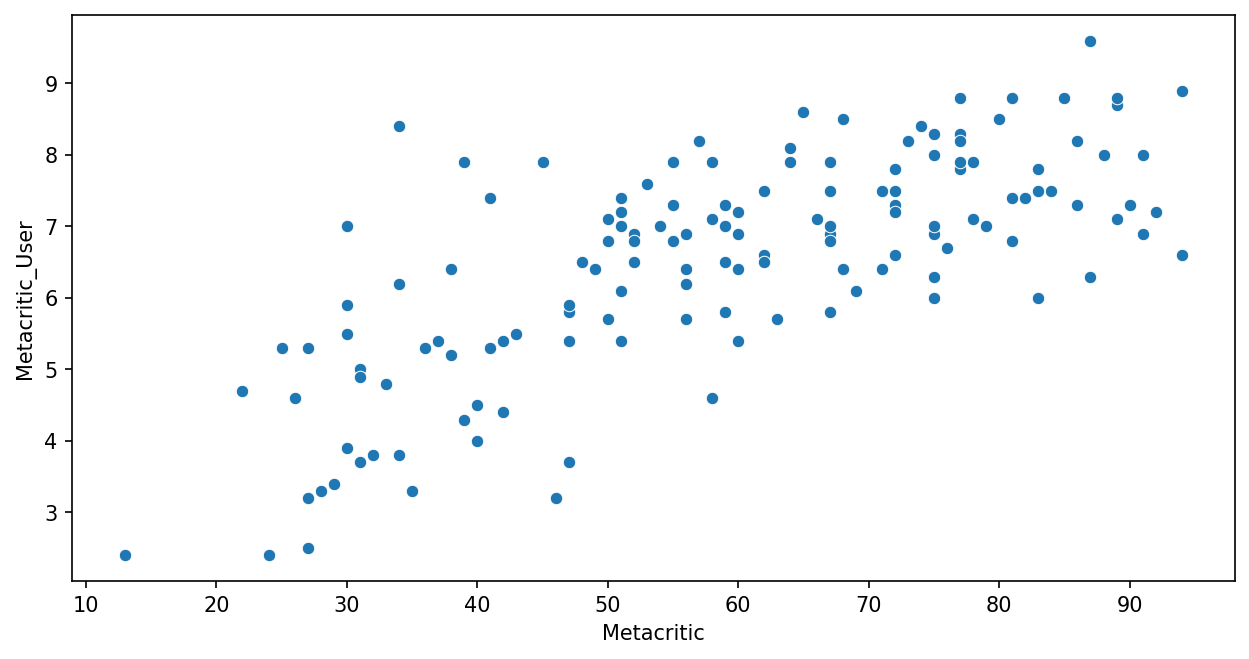

In [48]:
plt.figure(figsize=(10,5),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')

## IMDB

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

**We are to create a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.**

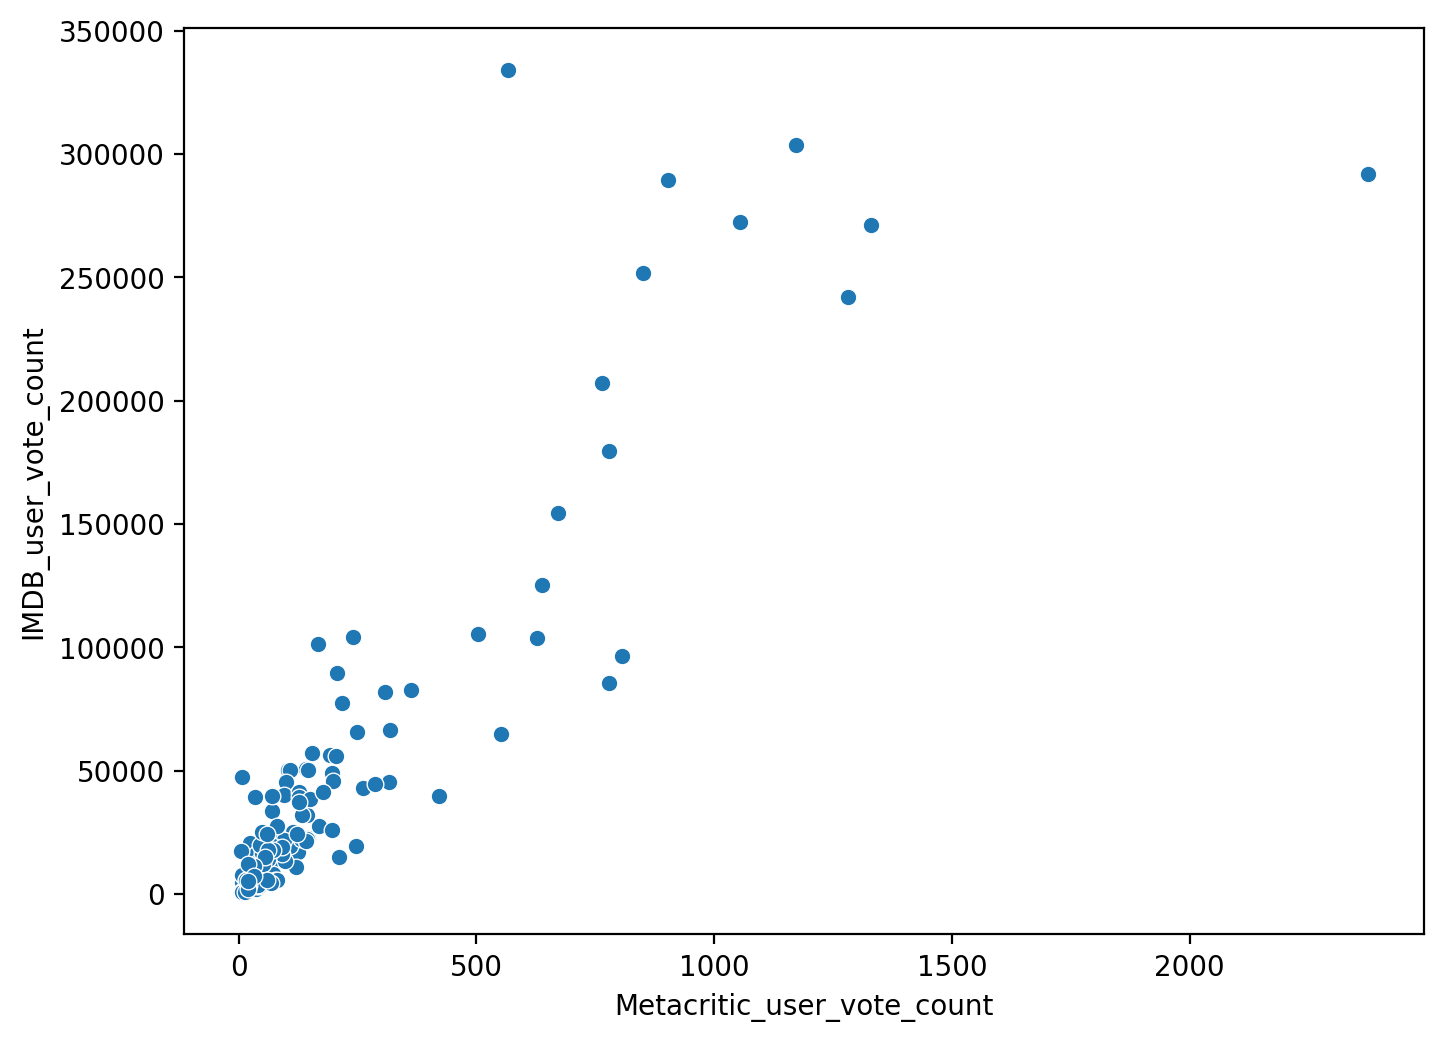

In [53]:
plt.figure(figsize=(8,6),dpi=200)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')
plt.show()

**We must notice here that there are two outliers here.The movie with the highest metacritic vote count on IMDB only has about 500 Metacritic ratings.We must see what is this movie**

In [54]:
all_sites.nlargest(1,'IMDB_user_vote_count')[['FILM','IMDB_user_vote_count']]

,FILM,IMDB_user_vote_count
14,The Imitation Game (2014),334164


**TASK: What movie has the highest Metacritic User Vote count?**

In [55]:
all_sites.sort_values('Metacritic_user_vote_count',ascending=False).iloc[0]

FILM                          Mad Max: Fury Road (2015)
RottenTomatoes                                       97
RottenTomatoes_User                                  88
Metacritic                                           89
Metacritic_User                                     8.7
IMDB                                                8.3
Metacritic_user_vote_count                         2375
IMDB_user_vote_count                             292023
USER_DIFF                                             9
Name: 88, dtype: object

**We see that the movie with the highest Metacritic User Vote count is Mad Max:Fury Road**

## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

**We are going to combine the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. We only want to compare movies that are in both DataFrames, so do an *inner* merge to merge together both DataFrames based on the FILM columns.**

In [63]:
all_tables = pd.merge(fandango,all_sites,on='FILM',how='inner')
all_tables

,FILM,STARS,RATING,VOTES,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,USER_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,0.1,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,0.0,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,0.2,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,0.2,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,0.0,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,0.0,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,0.4,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,0.3,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,0.1,95,86,86,7.3,7.4,14,696,9


In [64]:
all_tables.info()

#See the info on our new created dataframe which again we see that no null value
#are present.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   STARS_DIFF                  145 non-null    float64
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  USER_DIFF                   145 non-null    int64  
dtypes: float64(5), int64(7), object(1)


In [65]:
all_tables.head(5)

,FILM,STARS,RATING,VOTES,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,USER_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,0.1,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,0.0,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,0.2,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,0.2,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,0.0,98,90,94,8.9,8.6,807,96252,8


### Normalize columns to Fandango STARS and RATINGS 0-5 

Notice that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

**We are going to create new normalized columns for all ratings so they match up within the 0-5 star range shown on Fandango. There are many ways to do this.**



In [66]:
all_tables['RT_Norm']=round(all_tables['RottenTomatoes']/20,1)

In [67]:
all_tables['RTU_Norm']=round(all_tables['RottenTomatoes_User']/20,1)

In [68]:
all_tables['MT_Norm']=round(all_tables['Metacritic']/20,1)

In [69]:
all_tables['MTU_Norm']=round(all_tables['Metacritic_User']/2,1)

In [70]:
all_tables['IMDB_Norm']=round(all_tables['IMDB']/2,1)

all_tables

,FILM,STARS,RATING,VOTES,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,USER_DIFF,RT_Norm,RTU_Norm,MT_Norm,MTU_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,0.1,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,0.0,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,0.2,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,0.2,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,0.0,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,0.0,87,63,68,6.4,6.7,19,5289,24,4.4,3.2,3.4,3.2,3.4
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,0.4,95,81,87,6.3,7.0,18,1107,14,4.8,4.0,4.4,3.2,3.5
142,The Wrecking Crew (2015),4.5,4.2,38,0.3,93,84,67,7.0,7.8,4,732,9,4.6,4.2,3.4,3.5,3.9
143,Tangerine (2015),4.0,3.9,36,0.1,95,86,86,7.3,7.4,14,696,9,4.8,4.3,4.3,3.6,3.7


In [71]:
normal_scores=all_tables[['STARS','RATING','RT_Norm','RTU_Norm','MT_Norm','MTU_Norm','IMDB_Norm']]

In [72]:
normal_scores

,STARS,RATING,RT_Norm,RTU_Norm,MT_Norm,MTU_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushes displayed RATING higher than STARS, but are the ratings themselves higher than average?


**We are going to create a plot comparing the distributions of normalized ratings across all sites. There are many ways to do this, but explore the Seaborn KDEplot docs for some simple ways to quickly show this. Don't worry if your plot format does not look exactly the same as ours, as long as the differences in distribution are clear.**


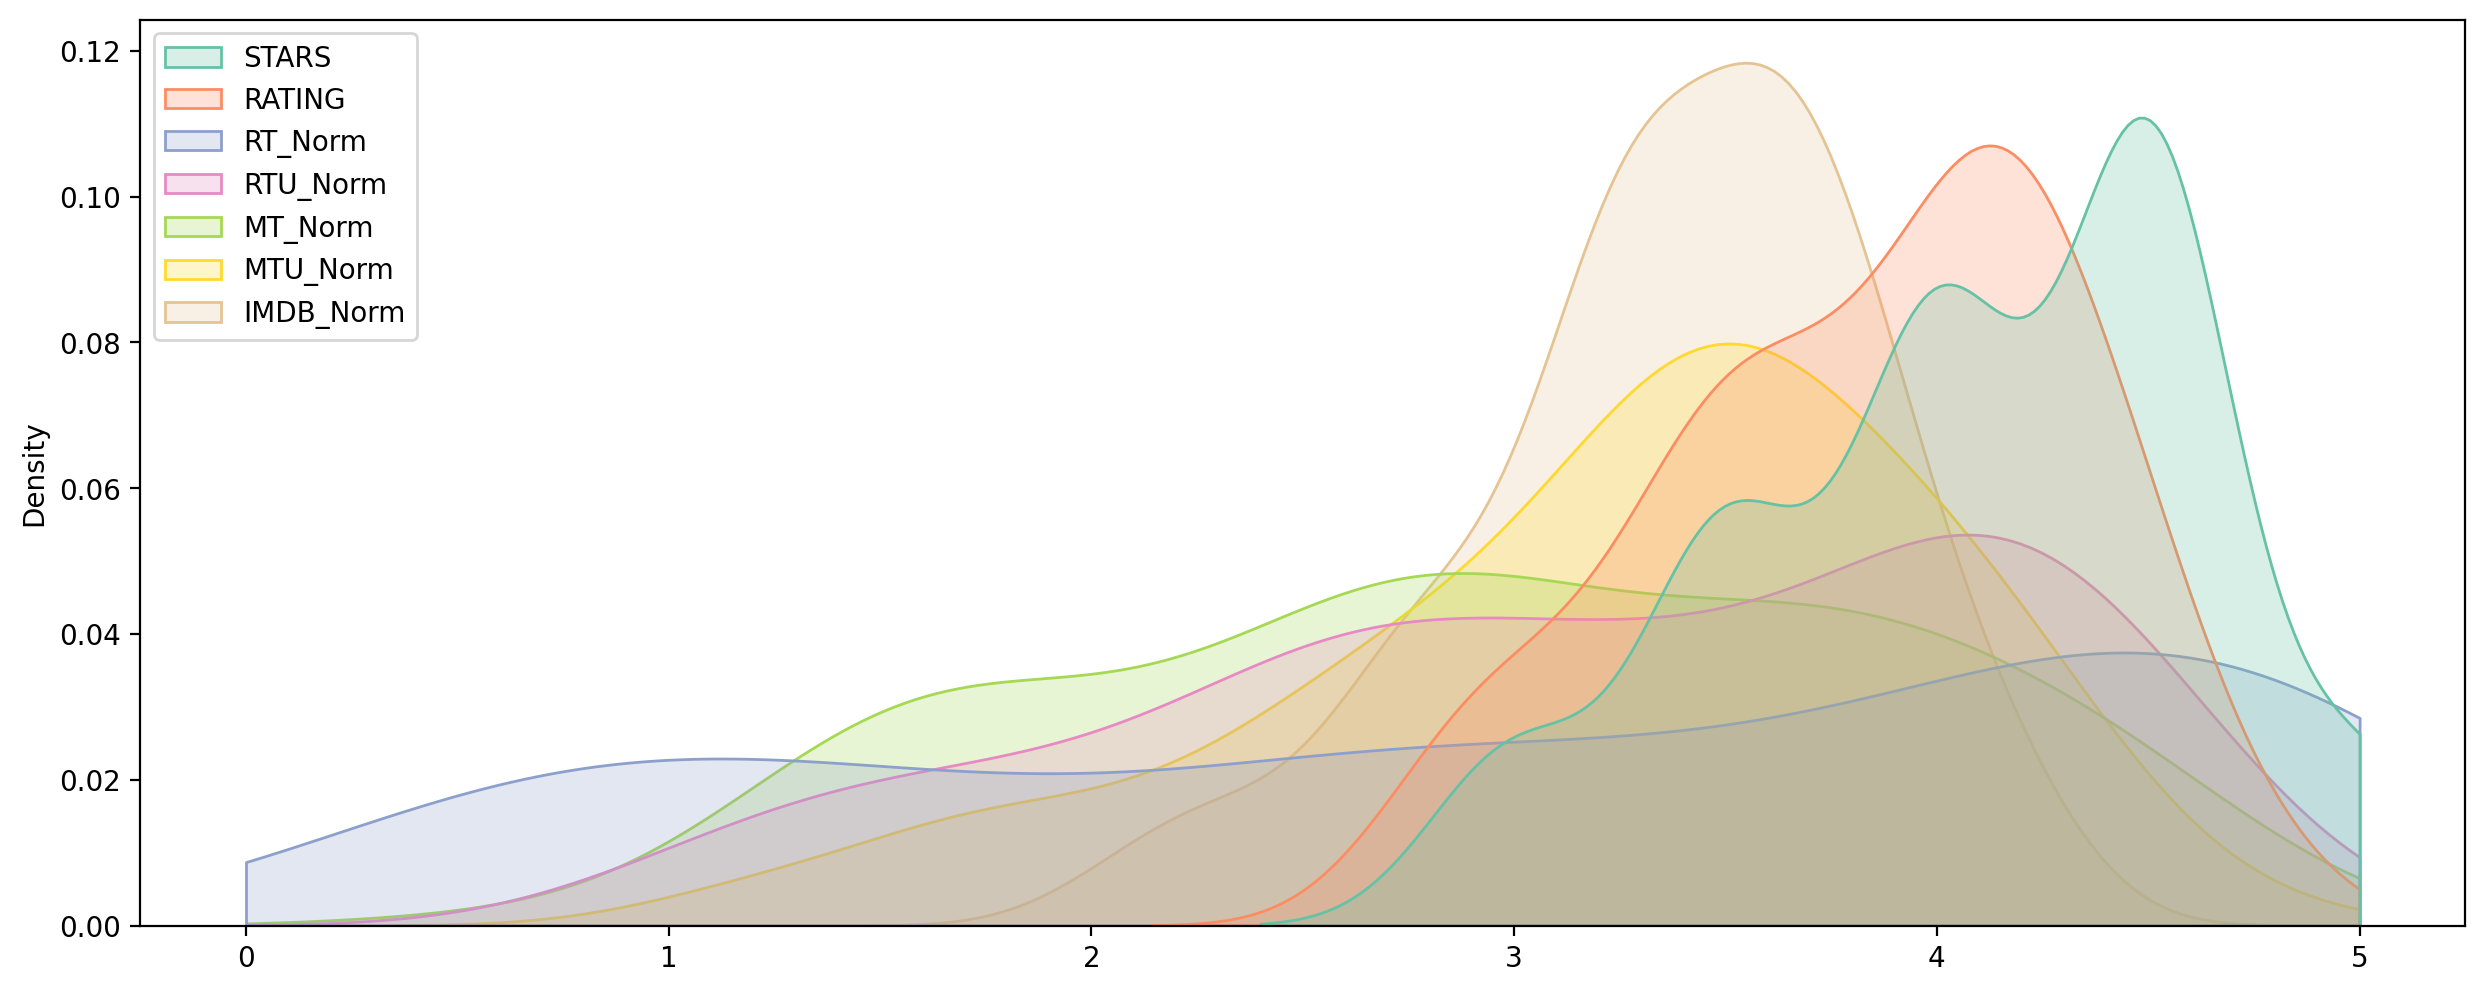

In [73]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)
    
fig,ax=plt.subplots(figsize=(15,6),dpi=200)
sns.kdeplot(data=normal_scores,clip=[0,5],shade=True,palette='Set2',ax=ax)
move_legend(ax,'upper left')

**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 

**We are going to make  a KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango.**

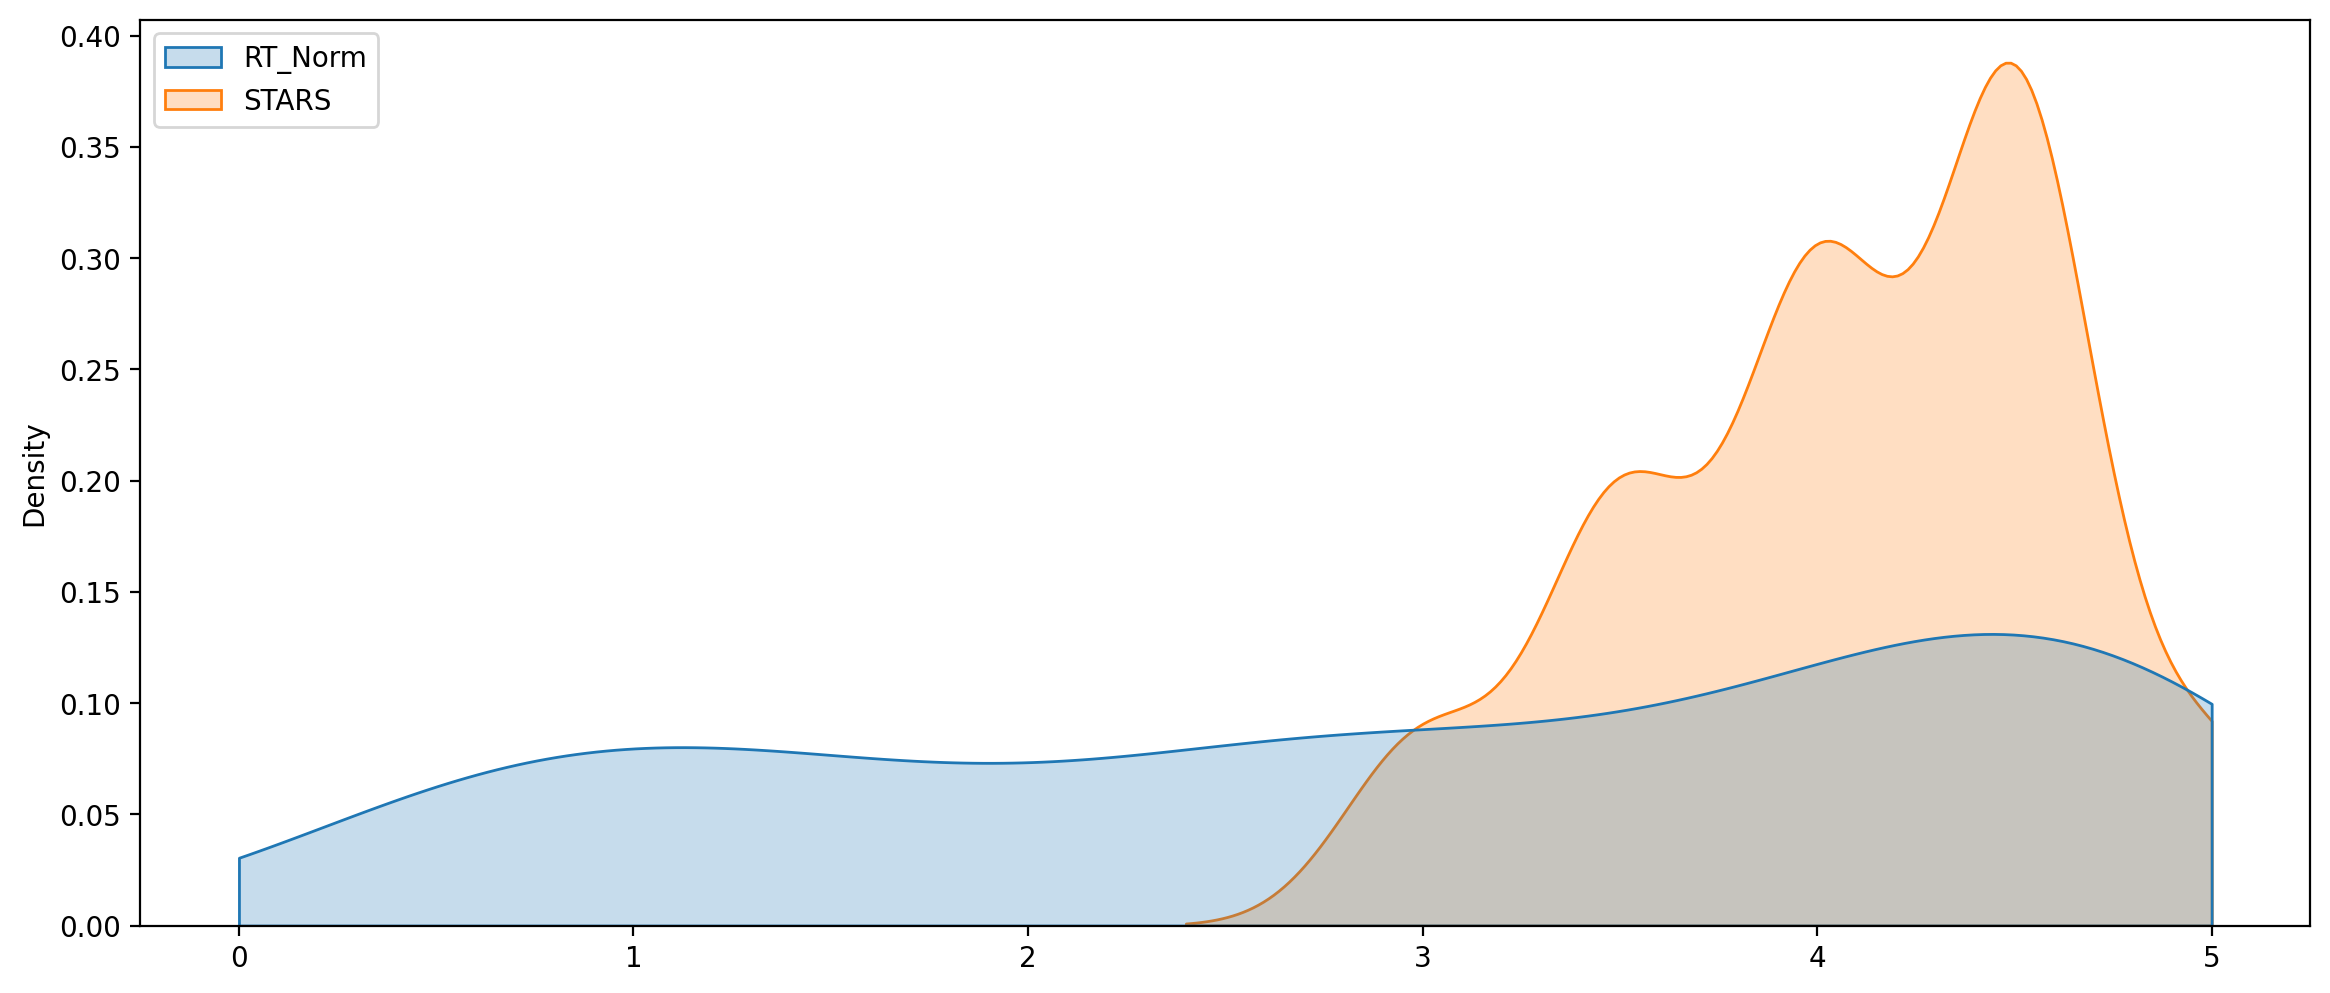

In [74]:
fig,ax=plt.subplots(figsize=(14,6),dpi=200)
sns.kdeplot(data=normal_scores[['RT_Norm','STARS']],clip=[0,5],shade=True)
move_legend(ax,'upper left')

**We are now gonna make a histplot comparing all the normalized data from the new table**

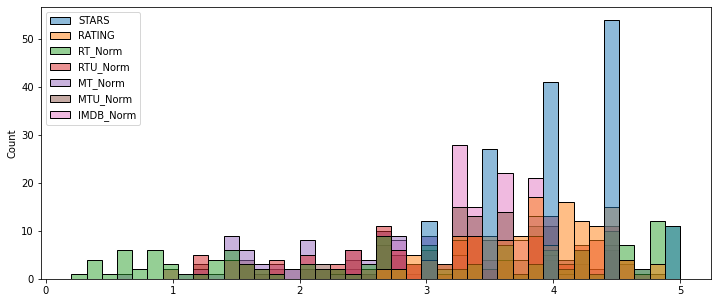

In [75]:
plt.figure(figsize=(12,5))
sns.histplot(data=normal_scores,bins=40)
plt.show()


### How are the worst movies rated across all platforms?

**We are going to create a clustermap visualization of all normalized scores. Note the differences in ratings, highly rated movies should be clustered together versus poorly rated movies. Note: This clustermap does not need to have the FILM titles as the index, feel free to drop it for the clustermap.**

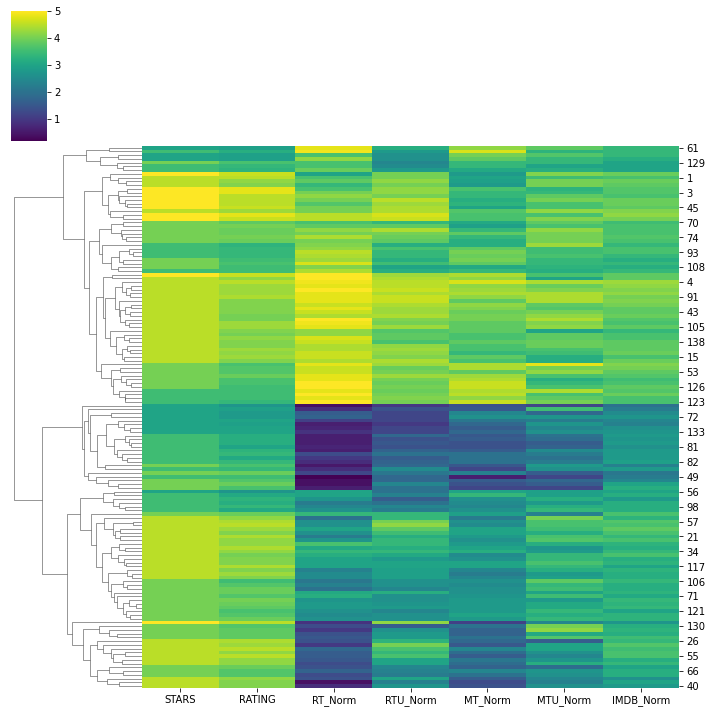

In [76]:
sns.clustermap(data=normal_scores,cmap='viridis',col_cluster=False)
plt.show()

**We can see that clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies? We may need to add the FILM column back in to your DataFrame of normalized scores to see the results.**

In [77]:
final_tables=all_tables[['STARS','RATING','RT_Norm','RTU_Norm','MT_Norm','MTU_Norm','IMDB_Norm','FILM']]
final_tables.nsmallest(10,'RT_Norm')

,STARS,RATING,RT_Norm,RTU_Norm,MT_Norm,MTU_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


**Now we are going to visualize the distribution of ratings across all sites for the top 10 worst movies.**

<AxesSubplot:ylabel='Density'>

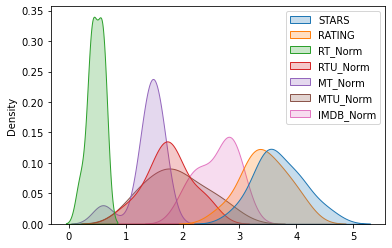

In [78]:
plt.figure()
sns.kdeplot(data=final_tables.nsmallest(10,'RT_Norm'),shade=True)

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**Final thoughts: Wow! Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) across the other platforms!**

In [79]:
final_tables.iloc[25]

STARS                   4.5
RATING                  4.1
RT_Norm                 0.4
RTU_Norm                2.3
MT_Norm                 1.3
MTU_Norm                2.3
IMDB_Norm               3.0
FILM         Taken 3 (2015)
Name: 25, dtype: object

----